## development notebook for model post-processing pipeline

In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import sys
import warnings
warnings.filterwarnings('ignore')

from importlib import reload
import glob
import os
import pandas as pd

plt.rcParams.update({'font.size': 12})
font = {'family' : 'normal',
'weight' : 'normal',
'size'   : 12}

plt.rc('font', **font)

## load relevant modules and dictionaries  

In [89]:
#### add the directory for the scripts, import list of models 
sys.path.append('/gpfs/home/mep22dku/scratch/AnalysisRobot/WORKSCRIPTS')
sys.path.append('/gpfs/home/mep22dku/scratch/AnalysisRobot/')
import cflx as cflx
import cflxPlotr as cP
import logr as log
import lom as lom
import copy
import robotFrame as robot
import summarymap as smap


analyzing TOM12_DW_WE43, 1950-2015
results directory (/gpfs/home/mep22dku/scratch/AnalysisRobot/RobotPlots/TOM12_DW_WE43) already made
website directory (/gpfs/home/mep22dku/scratch/PlankTOMRobot/RobotPlots/TOM12_DW_WE43) already made
/gpfs/home/mep22dku/scratch/PlankTOMRobot/RobotPlots/TOM12_DW_WE43/A01_SurfaceSummary.jpg
analyzing TOM12_DW_GA01, 1950-2015
results directory (/gpfs/home/mep22dku/scratch/AnalysisRobot/RobotPlots/TOM12_DW_GA01) already made
website directory (/gpfs/home/mep22dku/scratch/PlankTOMRobot/RobotPlots/TOM12_DW_GA01) already made
/gpfs/home/mep22dku/scratch/PlankTOMRobot/RobotPlots/TOM12_DW_GA01/A01_SurfaceSummary.jpg
analyzing TOM12_TJ_1ASA, 1950-2100
results directory (/gpfs/home/mep22dku/scratch/AnalysisRobot/RobotPlots/TOM12_TJ_1ASA) already made
website directory (/gpfs/home/mep22dku/scratch/PlankTOMRobot/RobotPlots/TOM12_TJ_1ASA) already made
/gpfs/home/mep22dku/scratch/PlankTOMRobot/RobotPlots/TOM12_TJ_1ASA/A01_SurfaceSummary.jpg
analyzing TOM10_CL_LIG9, 

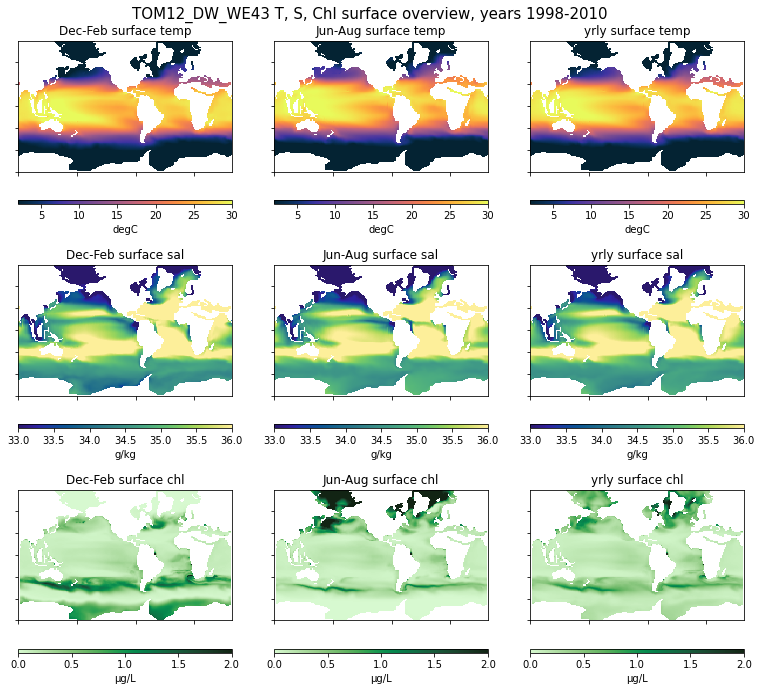

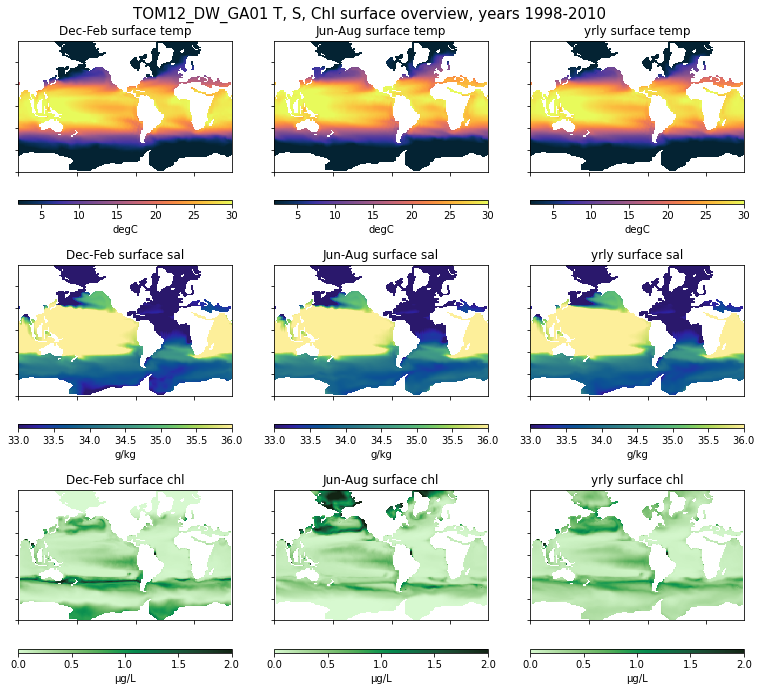

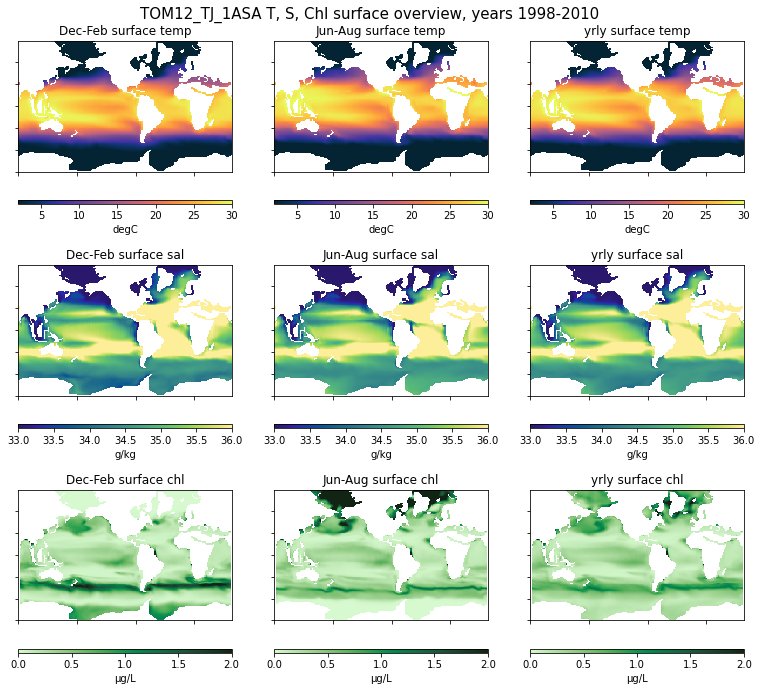

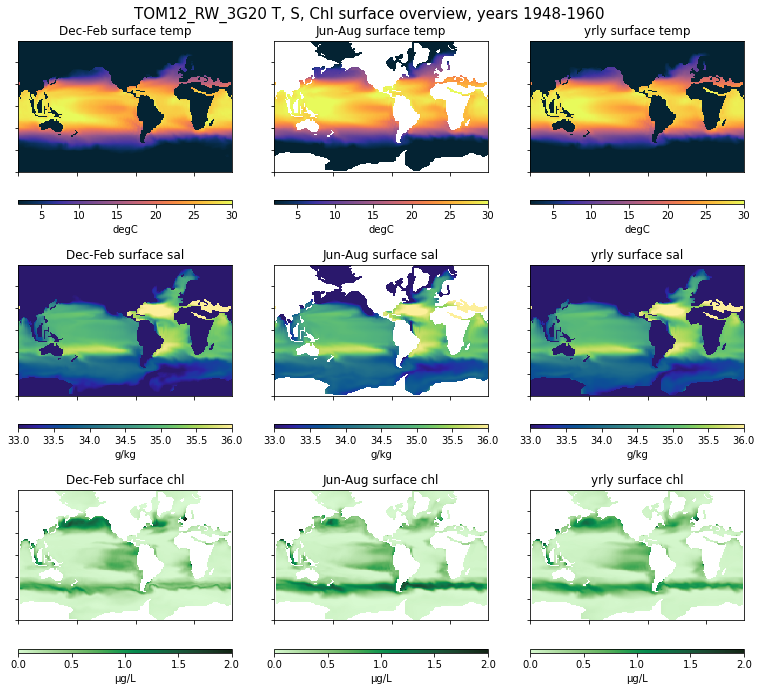

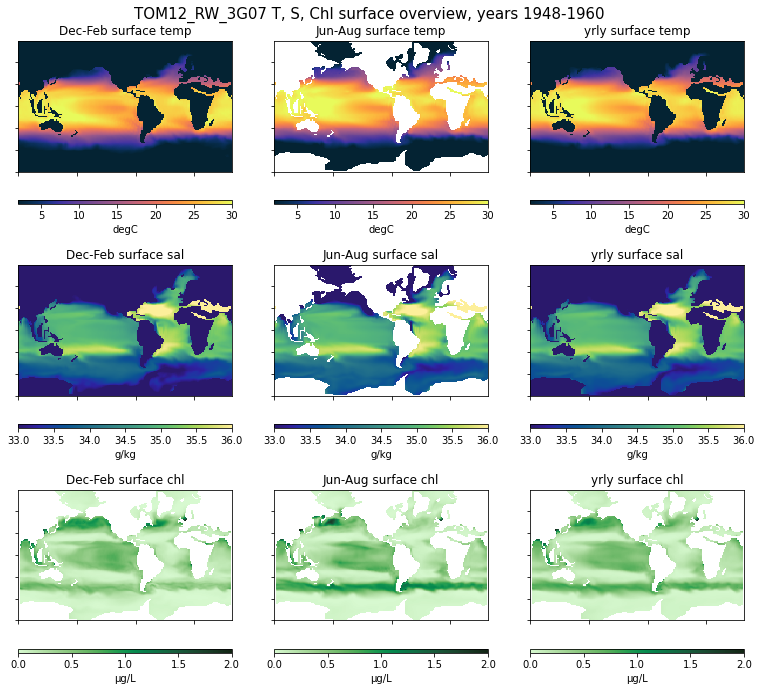

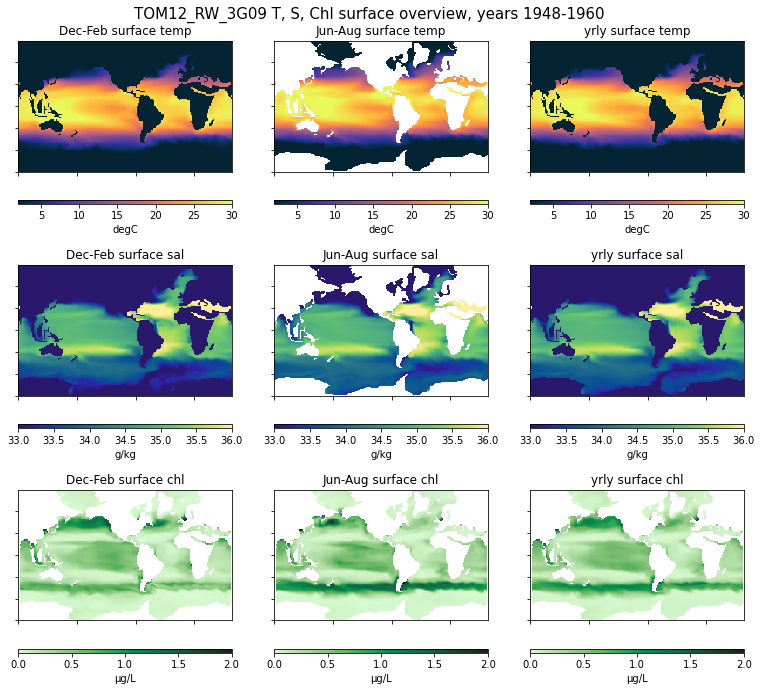

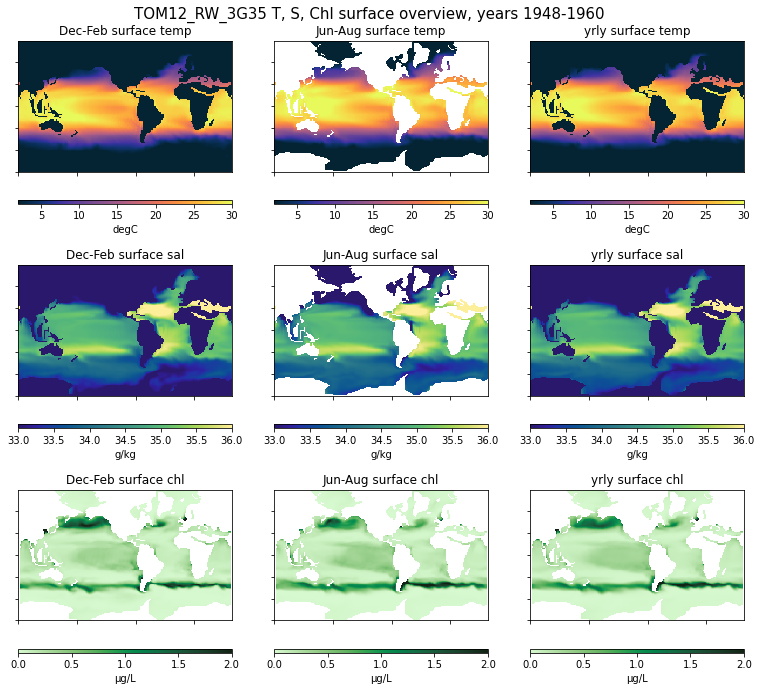

In [104]:
ourModels = 'modelsToAnalyze.txt'
reload(robot)
reload(cflx)
reload(cP)
reload(log)
reload(smap)
robot.runAnalysisRobot(ourModels)

reload(log)
print('done analyzing models, updating website')
mods = log.find_models()
log.list_models(mods)
log.make_summarypage(mods)
